In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from tqdm import tqdm

In [4]:
path = Path('/home/jupyter/data/carvana')
path.ls()

[PosixPath('/home/jupyter/data/carvana/train_masks.zip'),
 PosixPath('/home/jupyter/data/carvana/carvana-image-masking-challenge.zip'),
 PosixPath('/home/jupyter/data/carvana/metadata.csv'),
 PosixPath('/home/jupyter/data/carvana/test.zip'),
 PosixPath('/home/jupyter/data/carvana/labels'),
 PosixPath('/home/jupyter/data/carvana/train.zip'),
 PosixPath('/home/jupyter/data/carvana/29bb3ece3180_11.jpg'),
 PosixPath('/home/jupyter/data/carvana/test'),
 PosixPath('/home/jupyter/data/carvana/train_masks.csv'),
 PosixPath('/home/jupyter/data/carvana/train'),
 PosixPath('/home/jupyter/data/carvana/sample_submission.csv'),
 PosixPath('/home/jupyter/data/carvana/train_hq.zip'),
 PosixPath('/home/jupyter/data/carvana/test_hq.zip')]

In [5]:
path_img = path/'train/original'
path_lbl = path/'train_masks.csv'

In [6]:
fnames = path_img.ls()
fnames[:3]

[PosixPath('/home/jupyter/data/carvana/train/original/c4ac16c0dd59_15.jpg'),
 PosixPath('/home/jupyter/data/carvana/train/original/85cba1a00135_02.jpg'),
 PosixPath('/home/jupyter/data/carvana/train/original/6bfd601be25e_12.jpg')]

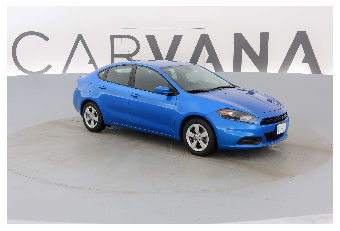

In [7]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(6, 4))

In [8]:
df_lbl = pd.read_csv(path_lbl)
df_lbl.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


In [8]:
def save_masks(size):
    save_dir = (path/'labels')/'x'.join([str(o) for o in size])
    save_dir.mkdir(exist_ok=True)
    for _, (fname, rle) in tqdm(df_lbl.iterrows()):
        arr = rle_decode(rle, shape=(1280, 1918)).astype(np.uint8)
        mask = PIL.Image.fromarray(arr).resize(size)
        mask.save((save_dir/fname).with_suffix('.png'))
    print((save_dir/fname).with_suffix('.png'))

In [13]:
def resize_one(fn, i, size):
    save_dir = (path/'train')/'x'.join([str(o) for o in size])
    save_dir.mkdir(exist_ok=True)
    img = PIL.Image.open(fn)
    img = img.resize(size).convert('RGB')
    img.save(save_dir/fn.name, quality=100)

In [14]:
size = (480, 320)
save_masks(size=size)
parallel(partial(resize_one, size=size), fnames)

In [15]:
size = (640, 960)
save_masks(size=size)
parallel(partial(resize_one, size=size), fnames)

(tensor(0), tensor(1), None)

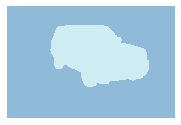

In [59]:
mask = open_mask('/home/jupyter/data/carvana/labels/480x320/fff9b3a5373f_16.png')
mask.data.min(), mask.data.max(), mask.show()

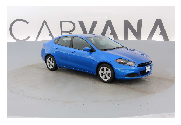

In [15]:
img = open_image('/home/jupyter/data/carvana/train/480x320/c4ac16c0dd59_15.jpg')
img.show()

In [10]:
save_dir = path/'labels/original2'
save_dir.mkdir(exist_ok=True)
for _, (fname, rle) in tqdm(df_lbl.iterrows()):
    arr = rle_decode(rle, shape=(1280, 1918)).astype(np.uint8) * 255
    mask = PIL.Image.fromarray(arr)
    mask.save((save_dir/fname).with_suffix('.png'))
print((save_dir/fname).with_suffix('.png'))

5088it [02:23, 35.34it/s]

/home/jupyter/data/carvana/labels/original2/fff9b3a5373f_16.png
